10.0%. Run time:  39.01s. Est. time left: 00:00:05:51
20.0%. Run time:  78.07s. Est. time left: 00:00:05:12
30.0%. Run time: 114.07s. Est. time left: 00:00:04:26
40.0%. Run time: 147.31s. Est. time left: 00:00:03:40
50.0%. Run time: 181.00s. Est. time left: 00:00:03:00
60.0%. Run time: 214.66s. Est. time left: 00:00:02:23
70.0%. Run time: 247.70s. Est. time left: 00:00:01:46
80.0%. Run time: 281.45s. Est. time left: 00:00:01:10
90.0%. Run time: 315.18s. Est. time left: 00:00:00:35
100.0%. Run time: 348.65s. Est. time left: 00:00:00:00
Total run time: 349.19s


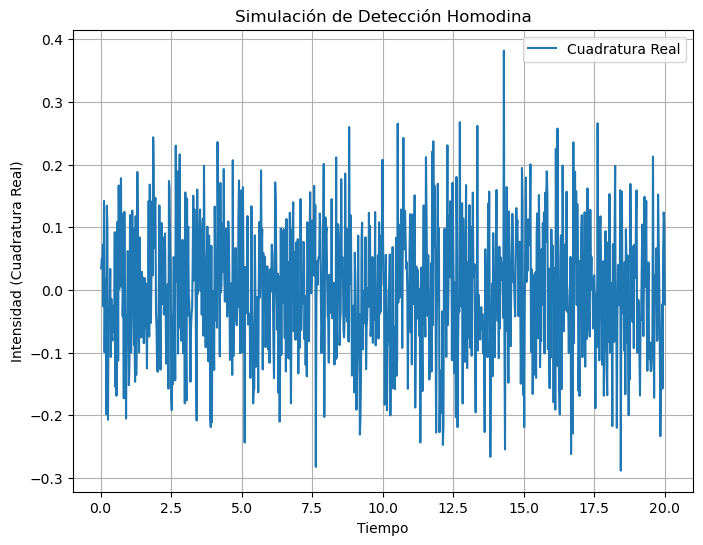

In [70]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()  # |g><g|
Aee = Ke * Ke.dag()  # |e><e|
Aeg = Ke * Kg.dag()  # |e><g|
Age = Kg * Ke.dag()  # |g><e|

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 1  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 1000)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Simulación con detección homodina
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    e_ops=expect_values,  # Valores esperados
    ntraj=5000,# Número de trayectorias
    options=options,
)

# Revisamos las mediciones
measurements = result.measurement
sum_measurements = np.sum(measurements, axis=0)
average_measurement = sum_measurements / len(measurements)

tlist = tlist[1:]  # Eliminar el primer elemento de tlist

# Si la medición tiene una forma (100, 2), la primera columna es la cuadratura real
I_real = average_measurement[0]

# Graficamos la medición
plt.figure(figsize=(8, 6))
plt.plot(tlist, I_real, label="Cuadratura Real")
plt.title("Simulación de Detección Homodina")
plt.xlabel("Tiempo")
plt.ylabel("Intensidad (Cuadratura Real)")
plt.legend()
plt.grid(True)
plt.show()

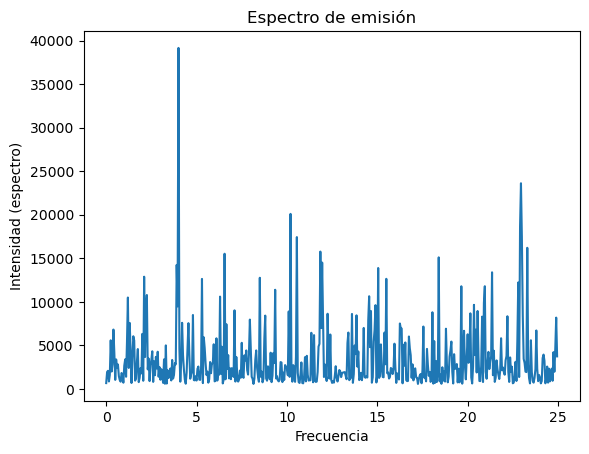

In [64]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Corrientes medidas (usamos las corrientes reales como ejemplo)
# Asegúrate de que `I_real` ya esté promediado sobre trayectorias si es necesario.
signal = I_real

# Tiempo entre puntos
dt = tlist[1] - tlist[0]

# Autocorrelación de la señal
correlation = np.correlate(signal, signal, mode='full')
correlation = correlation[correlation.size // 2:]  # Usamos solo la mitad positiva

# Transformada de Fourier de la autocorrelación
spectrum = np.abs(fft(correlation))**2

# Frecuencias asociadas
freqs = fftfreq(len(correlation), d=dt)

# Nos quedamos con las frecuencias positivas
positive_freqs = freqs[freqs >= 0]
positive_spectrum = spectrum[freqs >= 0]

# Graficamos el espectro
plt.figure()
plt.plot(positive_freqs, positive_spectrum)
plt.xlabel("Frecuencia")
plt.ylabel("Intensidad (espectro)")
plt.title("Espectro de emisión")
plt.show()


In [67]:
result.expect[0]

array([0.00000000e+00, 9.90049900e-05, 3.92045380e-04, 8.73213179e-04,
       1.53666675e-03, 2.37662967e-03, 3.38738529e-03, 4.56326462e-03,
       5.89871992e-03, 7.38833420e-03, 9.02654942e-03, 1.08083001e-02,
       1.27278761e-02, 1.47796143e-02, 1.69599317e-02, 1.92625705e-02,
       2.16848893e-02, 2.42172233e-02, 2.68599809e-02, 2.96041116e-02,
       3.24462699e-02, 3.53823119e-02, 3.84047500e-02, 4.15133040e-02,
       4.46937097e-02, 4.81328738e-02, 5.14723919e-02, 5.48799089e-02,
       5.83458398e-02, 6.18809728e-02, 6.54590095e-02, 6.90918424e-02,
       7.27770981e-02, 7.65281541e-02, 8.02942294e-02, 8.41262700e-02,
       8.79602422e-02, 9.18241298e-02, 9.57143008e-02, 9.96151574e-02,
       1.03519496e-01, 1.07512153e-01, 1.11523524e-01, 1.15538861e-01,
       1.19569492e-01, 1.23548657e-01, 1.27618824e-01, 1.31662762e-01,
       1.35650782e-01, 1.39689312e-01, 1.43793400e-01, 1.47727416e-01,
       1.51663689e-01, 1.55708223e-01, 1.59560973e-01, 1.63622076e-01,
      

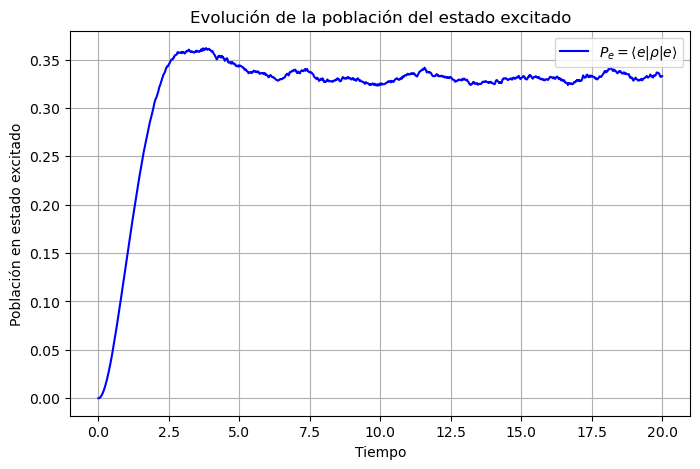

In [69]:
P_e = result.expect[0]
tlist = np.linspace(0, 20, 1000)
plt.figure(figsize=(8, 5))
plt.plot(tlist, P_e, label=r'$P_e = \langle e | \rho | e \rangle$', color='b')
plt.xlabel("Tiempo")
plt.ylabel("Población en estado excitado")
plt.title("Evolución de la población del estado excitado")
plt.legend()
plt.grid()
plt.show()

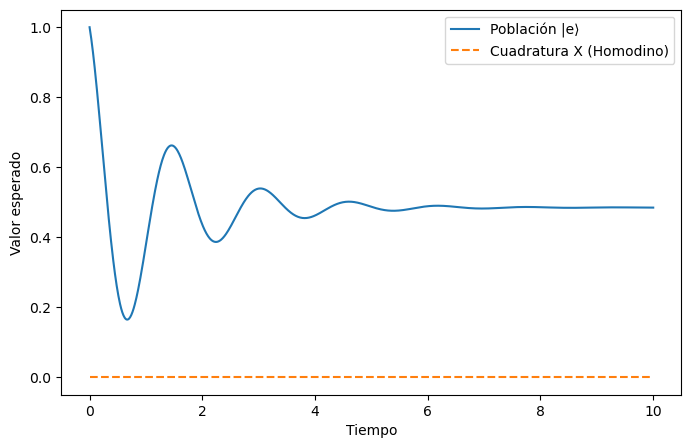

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parámetros del sistema
gamma = 1.0  # Tasa de decaimiento
Delta = 0.0  # Desajuste
Omega = 2.0  # Frecuencia de Rabi
tlist = np.linspace(0, 10, 1000)  # Tiempo de evolución

# Operadores del sistema
sm = destroy(2)  # Operador de aniquilación del sistema de dos niveles
sx = sm.dag() + sm  # Operador de Pauli X
sy = -1j * (sm.dag() - sm)  # Operador de Pauli Y
H = Delta * sm.dag() * sm + Omega * sx  # Hamiltoniano del sistema

# Estado inicial
psi0 = basis(2, 1)  # Estado excitado

# Operador de colapso para la detección homodina (basado en la cuadratura X)
c_ops = [np.sqrt(gamma) * sm]  # Emisión espontánea
e_ops = [sm.dag() * sm, sx]  # Población y cuadratura X

# Resolver la ecuación de la evolución con detección homodina
result = mesolve(H, psi0, tlist, c_ops, e_ops)

# Extraer los datos
population = result.expect[0]  # Población del estado excitado
quadrature_X = result.expect[1]  # Cuadratura medida

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(tlist, population, label="Población |e⟩")
plt.plot(tlist, quadrature_X, label="Cuadratura X (Homodino)", linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("Valor esperado")
plt.legend()
plt.show()


## homodina con fase pi medios, en el operador de colapso multiplicar por i


100.0%. Run time:   1.92s. Est. time left: 00:00:00:00
Total run time:   2.08s


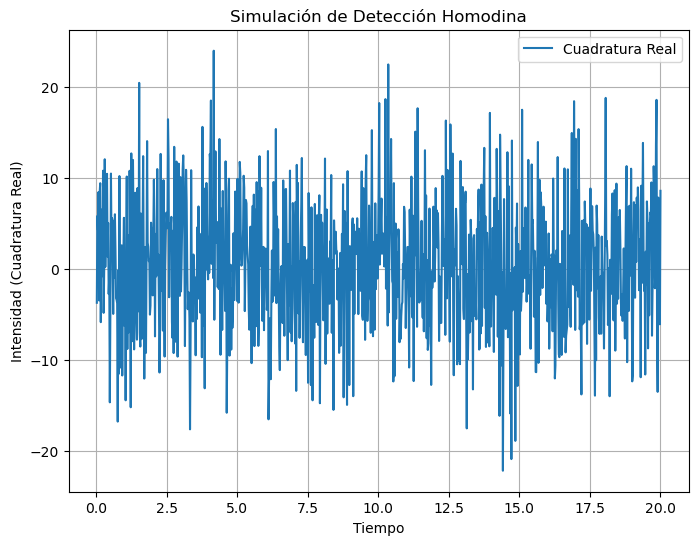

In [3]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()  # |g><g|
Aee = Ke * Ke.dag()  # |e><e|
Aeg = Ke * Kg.dag()  # |e><g|
Age = Kg * Ke.dag()  # |g><e|

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # Probabilidades de |e> y |g>

# Parámetros del sistema
Omega = 1  # Frecuencia de Rabi
g = 1  # Tasa de emisión espontánea

# Operador de colapso: emisión de |e> a |g>
Ceg = 1j *np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano: interacción entre |e> y |g>
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 1000)

# Opciones para smesolve
options = {"store_measurement": True, "map": "parallel"}

# Simulación con detección homodina
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,  # Operadores estocásticos
    e_ops=expect_values,  # Valores esperados
    ntraj=1,# Número de trayectorias
    options=options,
)

# Revisamos las mediciones
measurements = result.measurement
sum_measurements = np.sum(measurements, axis=0)
average_measurement = sum_measurements / len(measurements)

tlist = tlist[1:]  # Eliminar el primer elemento de tlist

# Si la medición tiene una forma (100, 2), la primera columna es la cuadratura real
I_real = average_measurement[0]

# Graficamos la medición
plt.figure(figsize=(8, 6))
plt.plot(tlist, I_real, label="Cuadratura Real")
plt.title("Simulación de Detección Homodina")
plt.xlabel("Tiempo")
plt.ylabel("Intensidad (Cuadratura Real)")
plt.legend()
plt.grid(True)
plt.show()

100.0%. Run time:   1.94s. Est. time left: 00:00:00:00
Total run time:   2.09s
100.0%. Run time:   1.91s. Est. time left: 00:00:00:00
Total run time:   2.06s


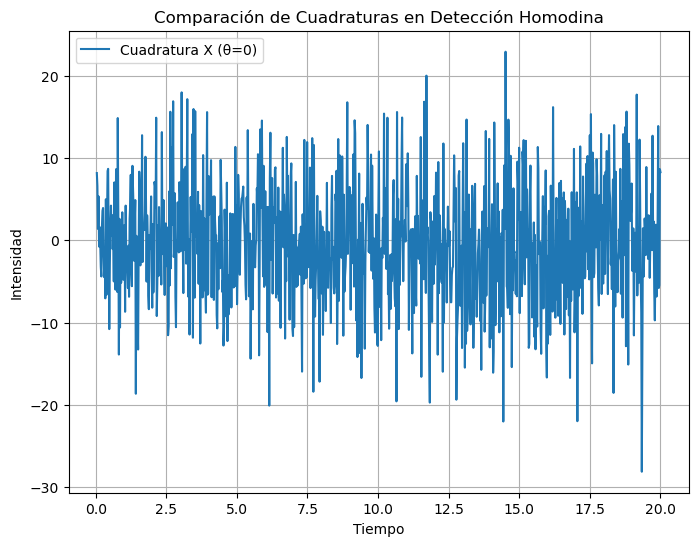

In [6]:
# Cuadratura X (θ = 0)
Ceg_X = np.sqrt(g) * Age

# Cuadratura P (θ = π/2)
Ceg_P = 1j * np.sqrt(g) * Age

# Simulación para X
result_X = smesolve(
    H, psi0, tlist, sc_ops=[Ceg_X], e_ops=expect_values, ntraj=1, options=options
)

# Simulación para P
result_P = smesolve(
    H, psi0, tlist, sc_ops=[Ceg_P], e_ops=expect_values, ntraj=1, options=options
)

# Extraer mediciones
measurements_X = np.sum(result_X.measurement, axis=0) / len(result_X.measurement)
measurements_P = np.sum(result_P.measurement, axis=0) / len(result_P.measurement)

# Graficar ambas cuadraturas
plt.figure(figsize=(8, 6))
plt.plot(tlist[1:], measurements_X[0], label="Cuadratura X (θ=0)")

plt.xlabel("Tiempo")
plt.ylabel("Intensidad")
plt.legend()
plt.grid(True)
plt.title("Comparación de Cuadraturas en Detección Homodina")
plt.show()

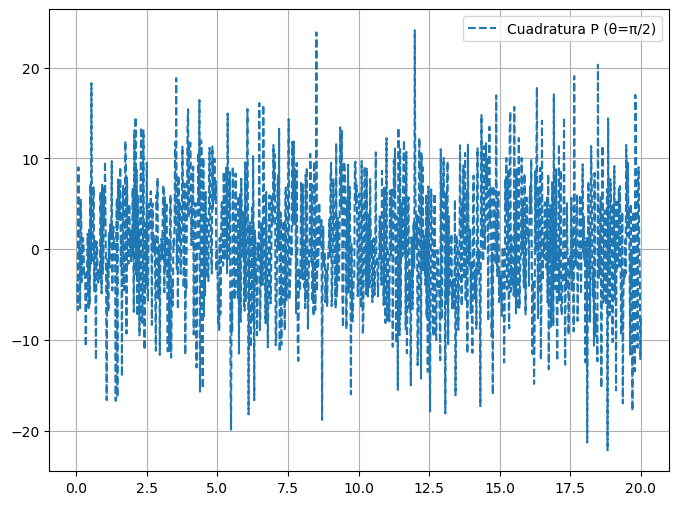

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(tlist[1:], measurements_P[0], label="Cuadratura P (θ=π/2)", linestyle="--")
plt.legend()
plt.grid(True)

10.0%. Run time:   3.06s. Est. time left: 00:00:00:27
20.0%. Run time:   6.48s. Est. time left: 00:00:00:25
30.0%. Run time:   9.90s. Est. time left: 00:00:00:23
40.0%. Run time:  13.33s. Est. time left: 00:00:00:19
50.0%. Run time:  16.77s. Est. time left: 00:00:00:16
60.0%. Run time:  20.22s. Est. time left: 00:00:00:13
70.0%. Run time:  23.67s. Est. time left: 00:00:00:10
80.0%. Run time:  27.06s. Est. time left: 00:00:00:06
90.0%. Run time:  30.48s. Est. time left: 00:00:00:03
100.0%. Run time:  33.92s. Est. time left: 00:00:00:00
Total run time:  34.27s


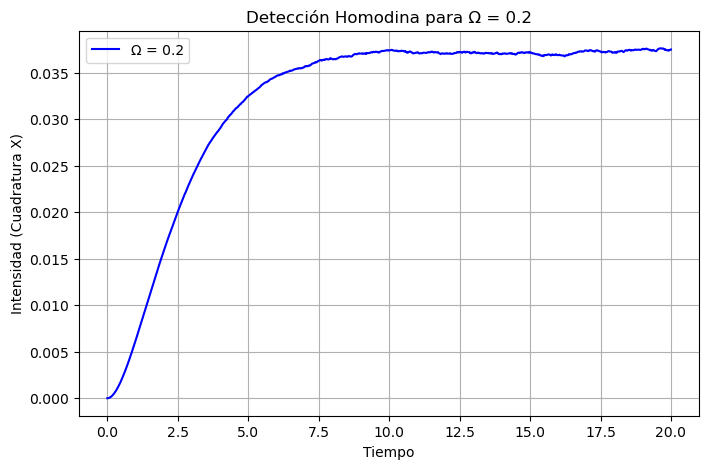

10.0%. Run time:   3.11s. Est. time left: 00:00:00:27
20.0%. Run time:   6.72s. Est. time left: 00:00:00:26
30.0%. Run time:  10.30s. Est. time left: 00:00:00:24
40.0%. Run time:  13.76s. Est. time left: 00:00:00:20
50.0%. Run time:  17.24s. Est. time left: 00:00:00:17
60.0%. Run time:  20.70s. Est. time left: 00:00:00:13
70.0%. Run time:  24.09s. Est. time left: 00:00:00:10
80.0%. Run time:  27.53s. Est. time left: 00:00:00:06
90.0%. Run time:  30.97s. Est. time left: 00:00:00:03
100.0%. Run time:  34.47s. Est. time left: 00:00:00:00
Total run time:  34.81s


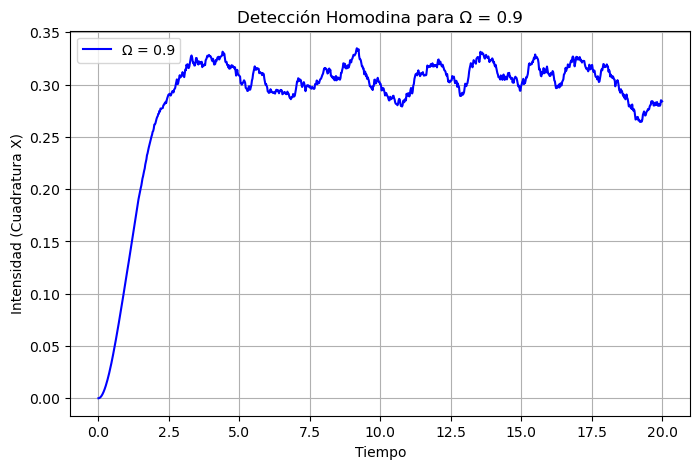

10.0%. Run time:   3.11s. Est. time left: 00:00:00:27
20.0%. Run time:   6.59s. Est. time left: 00:00:00:26
30.0%. Run time:  10.08s. Est. time left: 00:00:00:23
40.0%. Run time:  13.56s. Est. time left: 00:00:00:20
50.0%. Run time:  17.03s. Est. time left: 00:00:00:17
60.0%. Run time:  20.52s. Est. time left: 00:00:00:13
70.0%. Run time:  24.08s. Est. time left: 00:00:00:10
80.0%. Run time:  27.58s. Est. time left: 00:00:00:06
90.0%. Run time:  31.11s. Est. time left: 00:00:00:03
100.0%. Run time:  34.63s. Est. time left: 00:00:00:00
Total run time:  34.98s


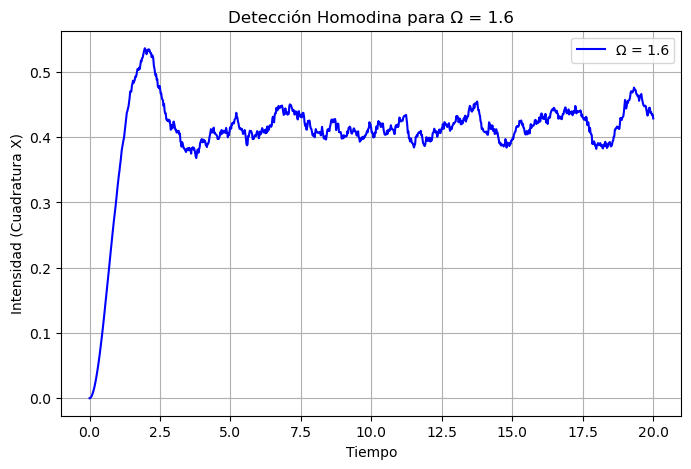

10.0%. Run time:   3.11s. Est. time left: 00:00:00:28
20.0%. Run time:   6.60s. Est. time left: 00:00:00:26
30.0%. Run time:  10.08s. Est. time left: 00:00:00:23
40.0%. Run time:  13.61s. Est. time left: 00:00:00:20
50.0%. Run time:  17.07s. Est. time left: 00:00:00:17
60.0%. Run time:  20.52s. Est. time left: 00:00:00:13
70.0%. Run time:  24.01s. Est. time left: 00:00:00:10
80.0%. Run time:  27.46s. Est. time left: 00:00:00:06
90.0%. Run time:  30.92s. Est. time left: 00:00:00:03
100.0%. Run time:  34.39s. Est. time left: 00:00:00:00
Total run time:  34.73s


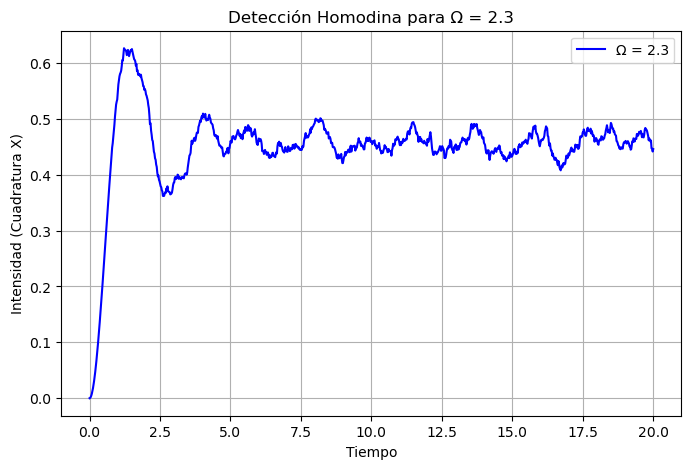

10.0%. Run time:   3.13s. Est. time left: 00:00:00:28
20.0%. Run time:   6.58s. Est. time left: 00:00:00:26
30.0%. Run time:  10.06s. Est. time left: 00:00:00:23
40.0%. Run time:  13.51s. Est. time left: 00:00:00:20
50.0%. Run time:  17.09s. Est. time left: 00:00:00:17
60.0%. Run time:  20.53s. Est. time left: 00:00:00:13
70.0%. Run time:  24.29s. Est. time left: 00:00:00:10
80.0%. Run time:  27.93s. Est. time left: 00:00:00:06
90.0%. Run time:  31.43s. Est. time left: 00:00:00:03
100.0%. Run time:  34.88s. Est. time left: 00:00:00:00
Total run time:  35.22s


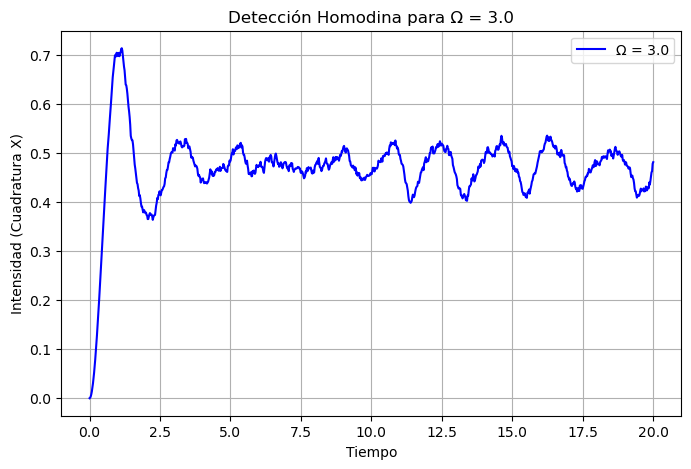

In [13]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # Estado base |g>
Ke = basis(NF, 0)  # Estado excitado |e>

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()  # |g><g|
Aee = Ke * Ke.dag()  # |e><e|
Aeg = Ke * Kg.dag()  # |e><g|
Age = Kg * Ke.dag()  # |g><e|

# Parámetro de emisión espontánea
g = 1  # Tasa de emisión espontánea

# Operador de colapso (detección homodina para cuadratura X)
Ceg = np.sqrt(g) * Age

# Lista de frecuencias de Rabi a probar
Omega_values = np.linspace(0.2, 3, 5)

# Tiempo de simulación
tlist = np.linspace(0, 20, 1000)

# Opciones para smesolve
options = {"store_measurement": True}

# Crear figuras separadas para cada frecuencia de Rabi
for Omega in Omega_values:
    # Hamiltoniano para cada Omega
    H = 0.5 * Omega * (Aeg + Age)

    # Simulación de una sola trayectoria
    result = smesolve(
        H,
        psi0,
        tlist,
        sc_ops=[Ceg],
        e_ops=[Aee],  # Seguimos solo la población del estado excitado
        ntraj=100,  # Solo una trayectoria
        options=options,
    )

    # Extraer medición de la cuadratura X
    measurements = result.measurement[0]  # Una sola trayectoria
    measurements = result.expect[0]

    # Crear figura individual para cada Omega
    plt.figure(figsize=(8, 5))
    plt.plot(tlist, measurements, label=f"Ω = {Omega:.1f}", color="b")
    plt.title(f"Detección Homodina para Ω = {Omega:.1f}")
    plt.xlabel("Tiempo")
    plt.ylabel("Intensidad (Cuadratura X)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [19]:

avg_measurement = np.mean(result.measurement, axis=0)
avg_measurement

array([[ 3.79378008e-01, -3.00769308e-01,  4.53404400e-01,
        -5.63885813e-01,  5.50786586e-01, -3.21877835e-01,
         3.98956632e-01, -7.15486798e-01,  8.03105659e-01,
         1.05783078e+00, -3.12436151e-01,  5.42336290e-01,
         2.61512416e-01, -2.86994988e-01,  9.85406469e-01,
         6.51701809e-01,  1.26073238e+00,  1.90275024e-01,
        -1.39499577e-01,  1.37603921e-01,  6.81509439e-01,
        -1.66883320e-01, -4.29241324e-01, -1.73079822e-01,
         1.37853358e-01, -6.31989016e-01, -1.41063043e+00,
        -6.21953160e-01,  1.60708631e-01, -1.38358243e+00,
        -1.26325580e-01,  1.11936006e+00,  2.89824665e-01,
         9.07093397e-03, -1.52613554e+00,  9.61165682e-01,
         8.54556450e-01, -9.64196570e-01,  1.25591936e-01,
         3.03618178e-01, -8.29998263e-01, -1.63271002e-01,
         2.51482564e-01, -5.96747576e-01, -3.97131458e-01,
        -4.32097855e-01,  2.17007946e-01,  1.37293156e-01,
        -9.82455993e-02,  5.28827919e-01,  6.80966675e-0

Primer punto simular con qutip para simular trayectorias para hacer ensambles y comparar con ecuación maestra.

En deteccion homodina probar la fase 0 y pi medios

Probar varias frecuencias de Rabi poblacion del estado exitado

Transformada de fourier, auto correlacion de la fotocorriente.

Articulo de carmichael : stochastic scroginer equations. esfera de bloch como bajo varios parametros se va a unos extremos.

termino de la eq de scrodinger hetero homo que es la fotocorriente.

Comparar ecuacion de qutip con las de carmichael y wiseman.

Para despues:
Hacer mi propio programa


10.0%. Run time:  16.77s. Est. time left: 00:00:02:30
20.0%. Run time:  34.01s. Est. time left: 00:00:02:16
30.0%. Run time:  51.35s. Est. time left: 00:00:01:59
40.0%. Run time:  68.58s. Est. time left: 00:00:01:42
50.0%. Run time:  85.84s. Est. time left: 00:00:01:25
60.0%. Run time: 103.45s. Est. time left: 00:00:01:08
70.0%. Run time: 120.87s. Est. time left: 00:00:00:51
80.0%. Run time: 138.66s. Est. time left: 00:00:00:34
90.0%. Run time: 157.15s. Est. time left: 00:00:00:17
100.0%. Run time: 174.48s. Est. time left: 00:00:00:00
Total run time: 174.83s


ValueError: x and y must have same first dimension, but have shapes (999,) and (1, 999)

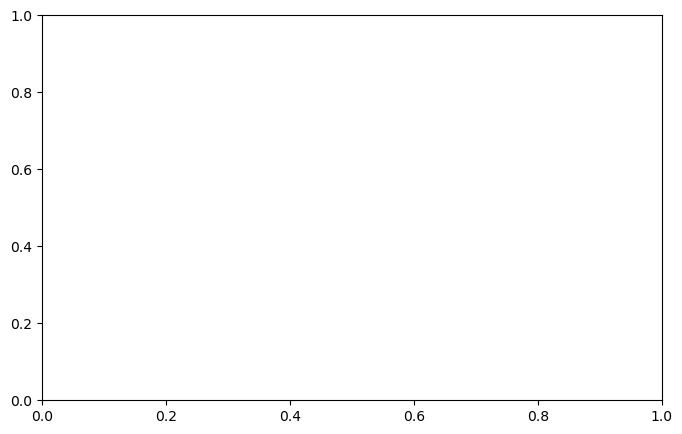

In [20]:
from qutip import basis, smesolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Parámetros del sistema
NF = 2
Kg = basis(NF, 1)  # Estado base |g>
Ke = basis(NF, 0)  # Estado excitado |e>
psi0 = Kg  # Estado inicial

# Operadores del sistema
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()

g = 1  # Tasa de emisión
Omega = 1  # Frecuencia de Rabi

# Operador de colapso: emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg]

# Hamiltoniano
H = 0.5 * Omega * (Aeg + Age)

# Tiempo de simulación
tlist = np.linspace(0, 20, 1000)
dt = tlist[1] - tlist[0]

# Simulación con varias trayectorias
ntraj = 500
result = smesolve(
    H,
    psi0,
    tlist,
    sc_ops=collapse,
    e_ops=[Aee],  # Seguimos solo la población excitada
    ntraj=ntraj,
    options={"store_measurement": True},
)

# Extraer mediciones
measurements = np.array(result.measurement)  # (ntraj, len(tlist)-1)
measurements = np.squeeze(measurements)
# Restar la contribución promedio del oscilador local
I_fluctuation = measurements - np.mean(measurements, axis=1, keepdims=True)

# Promediar sobre todas las trayectorias
I_mean = np.mean(I_fluctuation, axis=0)

# Transformada de Fourier
freqs = fftfreq(len(tlist)-1, dt)
spectrum = np.abs(fft(I_mean))**2



In [27]:
# Extraer mediciones
measurements = np.array(result.measurement)  # (ntraj, len(tlist)-1)
measurements = np.squeeze(measurements)
# Restar la contribución promedio del oscilador local
I_fluctuation = measurements - np.mean(measurements, axis=1, keepdims=True)

# Promediar sobre todas las trayectorias
I_mean = np.mean(I_fluctuation, axis=0)

# Transformada de Fourier
freqs = fftfreq(len(tlist)-1, dt)
spectrum = np.abs(fft(I_mean))**2

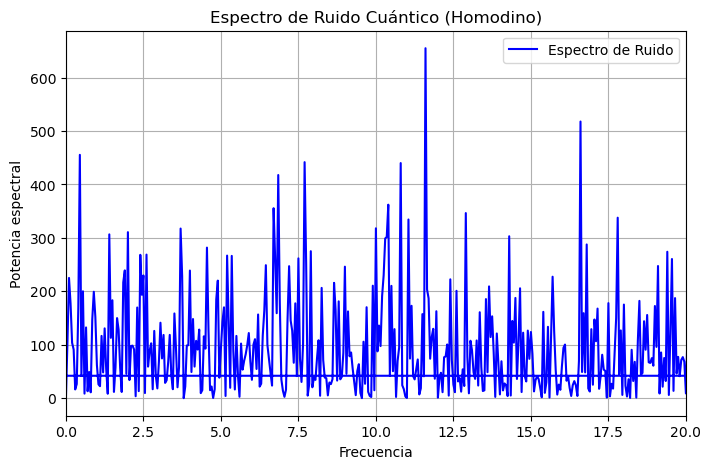

In [32]:
# Graficamos el espectro de ruido
plt.figure(figsize=(8, 5))
plt.plot(freqs, spectrum, label="Espectro de Ruido", color="b")
plt.xlim(0, 20)  # Nos quedamos con frecuencias bajas
plt.xlabel("Frecuencia")
plt.ylabel("Potencia espectral")
plt.title("Espectro de Ruido Cuántico (Homodino)")
plt.legend()
plt.grid(True)
plt.show()
